### The Toxic Pesticides
- Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.


- Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.


- You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

### Evaluation Metric
- The evaluation metric for this hackathon is Accuracy Score.

### Public and Private split
- The public leaderboard is based on 30% of test data, while final rank would be decided on remaining 70% of test data (which is private leaderboard)

 
### Guidelines for Final Submission
- Please ensure that your final submission includes the following:

- Solution file containing the predicted category for crop damage
- Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission

### Data Description

|Variable                   |Definition                                                                                |
|-----------------          |------------------------------------------------------------------------------------------|
|ID                         |UniqueID                                                                                  |
|Estimated_Insects_Count	|Estimated insects count per square meter                                                  |
|Crop_Type	                |Category of Crop(0,1)                                                                     |
|Soil_Type	                |Category of Soil (0,1)                                                                    |
|Pesticide_Use_Category	    |Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)                  |
|Number_Doses_Week	        |Number of doses per week                                                                  |
|Number_Weeks_Used	        |Number of weeks used                                                                      |
|Number_Weeks_Quit	        |Number of weeks quit                                                                      |
|Season	                    |Season Category (1,2,3)                                                                   |
|Crop_Damage	            |Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)  |


### sample_submission.csv

|ID:             |Unique ID                                          |
|------------    |---------------------------------------------------|
|Crop_Damage:    |Predicted Crop damage category for the test set    |



In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_yaOffsB.csv")
test = pd.read_csv("test_pFkWwen.csv")
submission = pd.read_csv("sample_submission_O1oDc4H.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
display(train.head())
display(test.head())
display(submission.head())

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [5]:
display(train.shape)
display(test.shape)

(88858, 10)

(59310, 9)

In [6]:
display(train.isnull().sum())
display(test.isnull().sum())

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [7]:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

- **0 = alive**


- **1 = Damage due to other causes**


- **2 = Damage due to Pesticides**

In [8]:
train['Number_Weeks_Used'].median()

28.0

In [9]:
train['Number_Weeks_Used'].fillna(28, inplace=True)

In [10]:
test['Number_Weeks_Used'].median()

28.0

In [11]:
test['Number_Weeks_Used'].fillna(28, inplace=True)

In [12]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [13]:
display(train.head())
display(test.head())

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [14]:
display(train.isnull().sum())
display(test.isnull().sum())

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

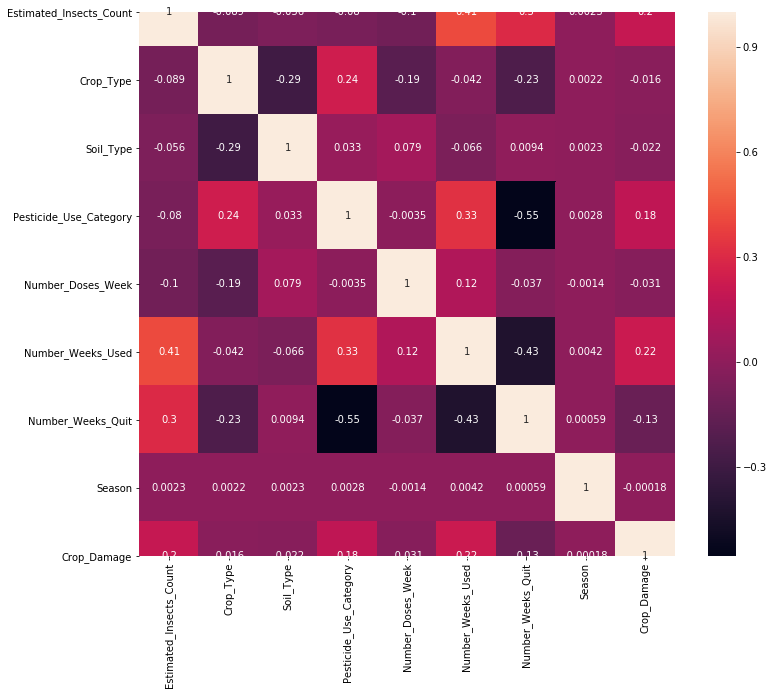

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True)

In [15]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier                  
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [17]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [18]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(71086, 8) (17772, 8) (71086,) (17772,)


### 1. Logistic Regression

In [30]:
LogReg = LogisticRegression(random_state=0, multi_class='ovr')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred_LogReg = LogReg.predict(X_test)

In [32]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))

Train Score 0.83 & Test Score 0.84


In [33]:
accuracy_score(y_test, y_pred_LogReg)

0.8358654062570335

### 2. Random Forest Classifier

### a. Default Selection

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
pred_rf = rf.predict(X_test)

In [44]:
accuracy_score(y_test, pred_rf )

0.8218546027458924

In [45]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.96 & Test Score 0.82


In [51]:
print(confusion_matrix(y_test, pred_rf))

[[14675   199     0]
 [ 2111   334     0]
 [  331   122     0]]


### b. Manual Parameters

In [28]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy',
                            max_features='sqrt', min_samples_leaf=10, random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [29]:
pred_rf = rf.predict(X_test)

In [30]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.85 & Test Score 0.84


### c. Random parameters

In [38]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',
                                  max_depth=3,max_features=2,min_samples_leaf= 3)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
pred_rf = rf.predict(X_test)

In [40]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.84 & Test Score 0.84


### d. Randomized Search Cv

In [41]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 7, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [42]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=100)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=entropy, total=  11.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=entropy, total=  10.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=entropy, total=  10.9s
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=1, max_features=log2, max_depth=560, criterion=gini 
[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=1, max_features=log2, max_depth=560, criterion=gini, total= 2.0min
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=1, max_features=log2, max_depth=560, criterion=gini 
[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=1, max_features=log2, max_depth=560, criterion=gini, total= 1.9min
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=1, max_features=log2, max_depth=560, criterion=gini 
[CV]  n_estima

[CV]  n_estimators=1400, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=1000, criterion=gini, total= 1.5min
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=450, criterion=gini 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=450, criterion=gini, total= 2.1min
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=450, criterion=gini 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=450, criterion=gini, total= 2.0min
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=450, criterion=gini 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=450, criterion=gini, total= 2.0min
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=230, criterion=gini 
[CV]  n_estimators=6

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=340, criterion=entropy, total=  48.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=340, criterion=entropy 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=340, criterion=entropy, total=  47.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=340, criterion=entropy 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=340, criterion=entropy, total=  48.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=780, criterion=entropy 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=780, criterion=entropy, total=  40.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=780, criterion=entropy 
[CV]

[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=230, criterion=entropy 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=230, criterion=entropy, total= 1.8min
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=230, criterion=entropy 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=230, criterion=entropy, total= 1.8min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=890, criterion=gini 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=890, criterion=gini, total=  56.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=890, criterion=gini 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=890, criterion=gini, total=  57.0s
[CV] n_e

[CV]  n_estimators=400, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini, total=  18.8s
[CV] n_estimators=400, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=400, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini, total=  18.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=gini 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=gini, total=  11.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=gini 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=gini, total=  11.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=gini 
[CV]  n_estimators=200, min_sam

[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=120, criterion=entropy 
[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=120, criterion=entropy, total= 2.1min
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=120, criterion=entropy 
[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=120, criterion=entropy, total= 2.1min
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=120, criterion=entropy 
[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=120, criterion=entropy, total= 2.3min
[CV] n_estimators=2000, min_samples_split=9, min_samples_leaf=4, max_features=log2, max_depth=780, criterion=gini 
[CV]  n_estimators=2000, min_samples_split=9, min_samples_leaf=4, max_features=log2, max_depth=780, criterion=gini, total= 2.3min
[C

[CV]  n_estimators=600, min_samples_split=9, min_samples_leaf=8, max_features=auto, max_depth=230, criterion=gini, total=  30.4s
[CV] n_estimators=600, min_samples_split=9, min_samples_leaf=8, max_features=auto, max_depth=230, criterion=gini 
[CV]  n_estimators=600, min_samples_split=9, min_samples_leaf=8, max_features=auto, max_depth=230, criterion=gini, total=  30.1s
[CV] n_estimators=600, min_samples_split=9, min_samples_leaf=8, max_features=auto, max_depth=230, criterion=gini 
[CV]  n_estimators=600, min_samples_split=9, min_samples_leaf=8, max_features=auto, max_depth=230, criterion=gini, total=  30.1s
[CV] n_estimators=2000, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=670, criterion=entropy 
[CV]  n_estimators=2000, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=670, criterion=entropy, total=26.3min
[CV] n_estimators=2000, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=670, criterion=entropy 
[CV]  n_estimato

[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=1000, criterion=gini, total=  13.4s
[CV] n_estimators=200, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=1000, criterion=gini 
[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=4, max_features=log2, max_depth=1000, criterion=gini, total=  13.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy, total=  26.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy, total=  26.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy 
[CV]  n_es

[CV]  n_estimators=2000, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy, total= 2.3min
[CV] n_estimators=2000, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy 
[CV]  n_estimators=2000, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=entropy, total= 2.2min
[CV] n_estimators=400, min_samples_split=7, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=400, min_samples_split=7, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini, total=  20.0s
[CV] n_estimators=400, min_samples_split=7, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=400, min_samples_split=7, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini, total=  18.6s
[CV] n_estimators=400, min_samples_split=7, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=40

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 1071.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', sc

In [43]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 9,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 230,
 'criterion': 'gini'}

In [44]:
rf_randomcv.best_score_

0.8463691866190248

In [45]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=230, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=230, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=230, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
pred_rf = rf.predict(X_test)

In [48]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.86 & Test Score 0.85


### 3. XGBOOST

In [21]:
reg_xgb = xgboost.XGBClassifier(objective='multi:softprob')
reg_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# predicting X_test
y_pred_xgb = reg_xgb.predict(X_test)

In [23]:
print("Train Score {:.2f} & Test Score {:.2f}".format(reg_xgb.score(X_train,y_train),reg_xgb.score(X_test,y_test)))

Train Score 0.86 & Test Score 0.85


In [24]:
accuracy_score(y_test, y_pred_xgb)

0.8466689173981544

### Manual Parameters

In [33]:
reg_xgb = xgboost.XGBClassifier(objective='multi:softprob', min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5,)
reg_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# predicting X_test
y_pred_xgb = reg_xgb.predict(X_test)

In [35]:
print("Train Score {:.2f} & Test Score {:.2f}".format(reg_xgb.score(X_train,y_train),reg_xgb.score(X_test,y_test)))

Train Score 0.85 & Test Score 0.85


### 6. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [26]:
KNN.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print("Train Score {:.2f} & Test Score {:.2f}".format(KNN.score(X_train,y_train), KNN.score(X_test,y_test)))

Train Score 0.85 & Test Score 0.83


### 7. Naive Bayes classifier

In [28]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 

In [29]:
gnb_predictions = gnb.predict(X_test)

In [30]:
print("Train Score {:.2f} & Test Score {:.2f}".format(gnb.score(X_train,y_train), gnb.score(X_test,y_test)))

Train Score 0.82 & Test Score 0.82


### TPOT

In [35]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=2, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.8460878218013008
Generation 2 - Current best internal CV score: 0.8460878218013008

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.9500000000000001, min_samples_leaf=12, min_samples_split=16, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=2,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=50,
        random_state=None, scoring=None, subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

In [36]:
tpot_predictions = tpot.predict(X_test)

In [37]:
print("Train Score {:.2f} & Test Score {:.2f}".format(tpot.score(X_train,y_train), tpot.score(X_test,y_test)))

Train Score 0.86 & Test Score 0.85


### Submission

In [38]:
# predicting test
y_pred_test = tpot.predict(test)

In [39]:
submission = pd.DataFrame({'ID': test_original['ID'], 'Crop_Damage': y_pred_test})
submission.to_csv('Agriculture.csv', index=False)